#  COVID 19 PREDICTION INDIA

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import numpy as np

## Loading Dataset

In [42]:
df = pd.read_csv('covid_19_india.csv', parse_dates=['Date'], dayfirst=True)

## A quick look at Dataset


In [3]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
df = df[['Date', 'State/UnionTerritory','Cured','Deaths','Confirmed']]

df.columns = ['date','state','cured','deaths','confirmed']

## Top 5 and Bottom 5 from dataset

In [5]:
df.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [6]:
df.tail()

,date,state,cured,deaths,confirmed
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999


In [7]:
today = df[df.date == '2020-07-17']

In [8]:
today.head()

,date,state,cured,deaths,confirmed
4179,2020-07-17,Andaman and Nicobar Islands,133,0,180
4180,2020-07-17,Andhra Pradesh,19393,492,38044
4181,2020-07-17,Arunachal Pradesh,153,3,543
4182,2020-07-17,Assam,12888,48,19754
4183,2020-07-17,Bihar,14018,197,21764


In [9]:
max_confirmed_cases = today.sort_values(by="confirmed",ascending=False)
max_confirmed_cases.head()

,date,state,cured,deaths,confirmed
4198,2020-07-17,Maharashtra,158140,11194,284281
4208,2020-07-17,Tamil Nadu,107416,2236,156369
4187,2020-07-17,Delhi,97693,3545,118645
4194,2020-07-17,Karnataka,19729,1032,51422
4189,2020-07-17,Gujarat,32103,2089,45481


In [10]:
top_states_confirmed= max_confirmed_cases[0:5]

<AxesSubplot:xlabel='state', ylabel='confirmed'>

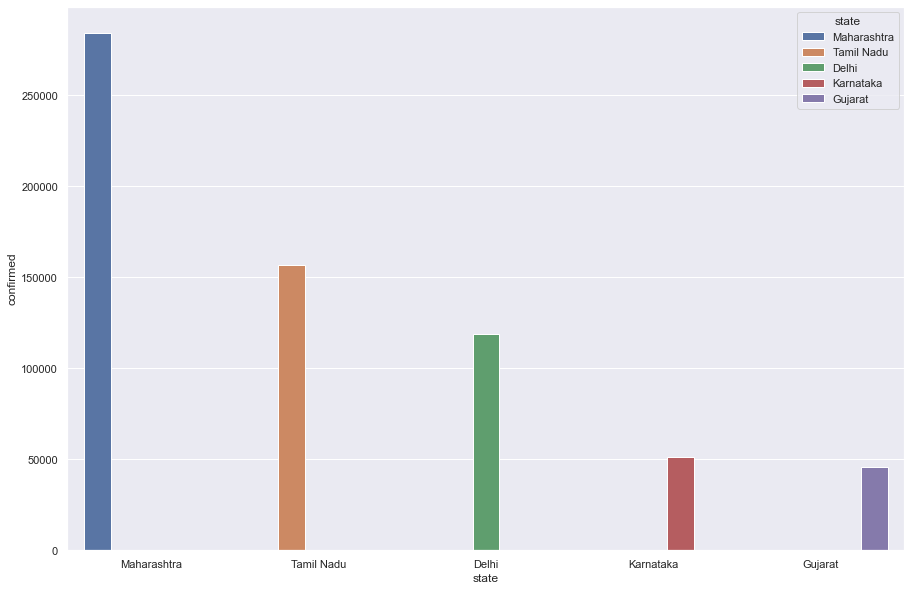

In [11]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="confirmed",data= top_states_confirmed, hue="state")

In [12]:
max_death_cases=today.sort_values(by="deaths",ascending=False)
max_death_cases.head()

,date,state,cured,deaths,confirmed
4198,2020-07-17,Maharashtra,158140,11194,284281
4187,2020-07-17,Delhi,97693,3545,118645
4208,2020-07-17,Tamil Nadu,107416,2236,156369
4189,2020-07-17,Gujarat,32103,2089,45481
4212,2020-07-17,Uttar Pradesh,26675,1046,43441


In [13]:
top_states_death= max_death_cases[0:5]

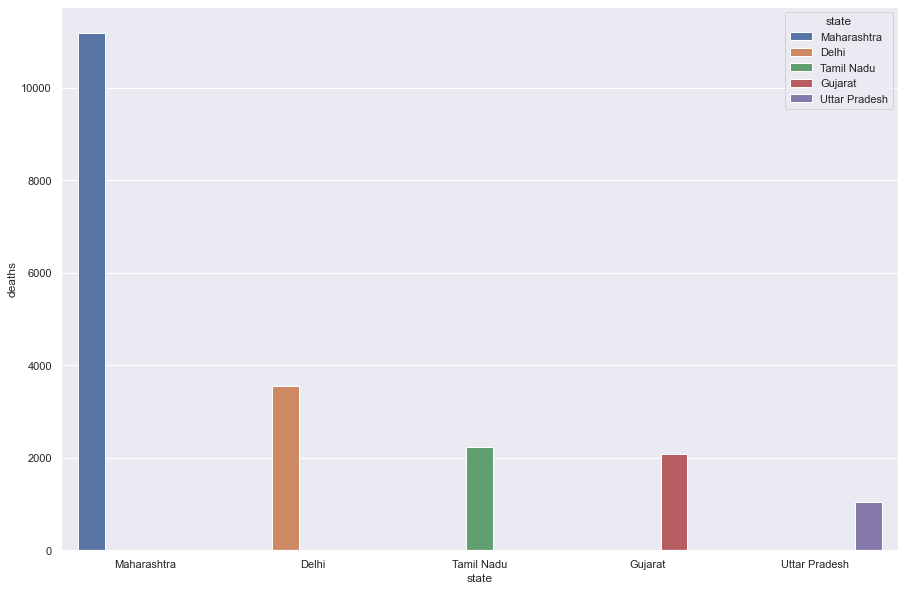

In [14]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="deaths",data= top_states_death, hue="state")
plt.show()

In [15]:
max_cured_cases=today.sort_values(by="cured",ascending=False)
max_cured_cases

,date,state,cured,deaths,confirmed
4198,2020-07-17,Maharashtra,158140,11194,284281
4208,2020-07-17,Tamil Nadu,107416,2236,156369
4187,2020-07-17,Delhi,97693,3545,118645
4189,2020-07-17,Gujarat,32103,2089,45481
4209,2020-07-17,Telengana,27295,396,41018
4212,2020-07-17,Uttar Pradesh,26675,1046,43441
4213,2020-07-17,West Bengal,21415,1023,36117
4206,2020-07-17,Rajasthan,19970,538,27174
4194,2020-07-17,Karnataka,19729,1032,51422
4180,2020-07-17,Andhra Pradesh,19393,492,38044


In [16]:
top_states_cured=max_cured_cases[0:5]

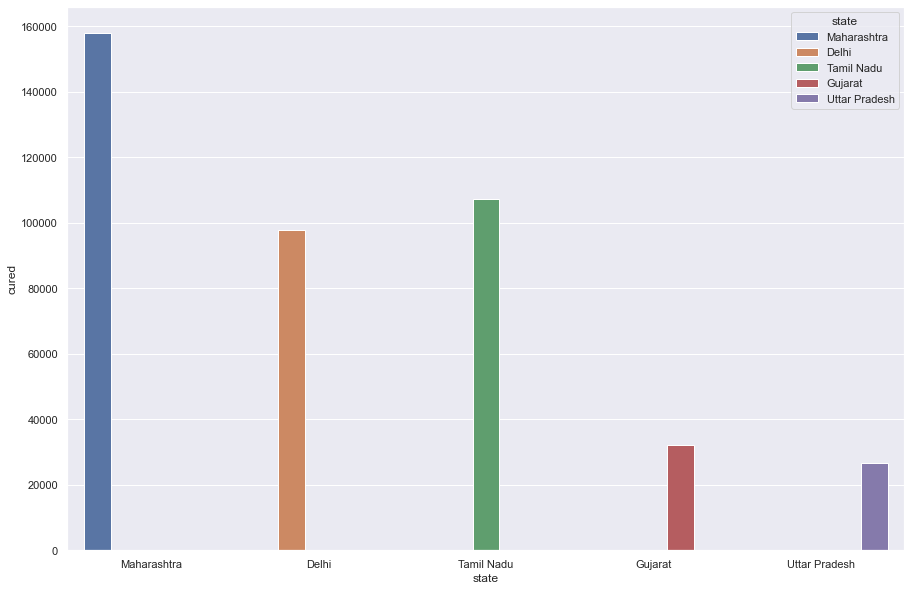

In [17]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="cured",data= top_states_death, hue="state")
plt.show()

## Analysis of Maharashtra state

In [18]:
maha = df[df.state == 'Maharashtra']
maha

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14
...,...,...,...,...,...
17950,2021-08-07,Maharashtra,6130137,133717,6341759
17986,2021-08-08,Maharashtra,6139493,133845,6347820
18022,2021-08-09,Maharashtra,6144388,133996,6353328
18058,2021-08-10,Maharashtra,6151956,134064,6357833


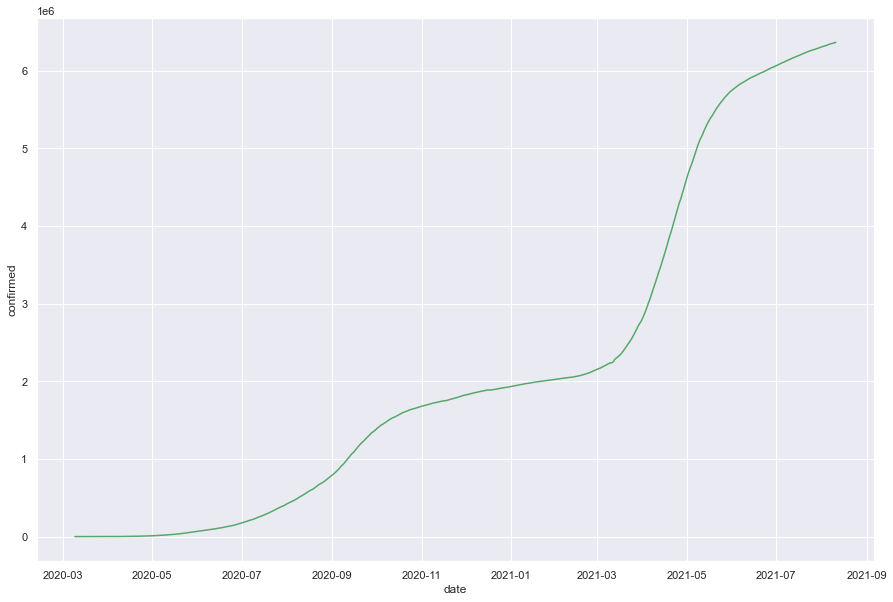

In [20]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="confirmed",data= maha, color = 'g')
plt.show()

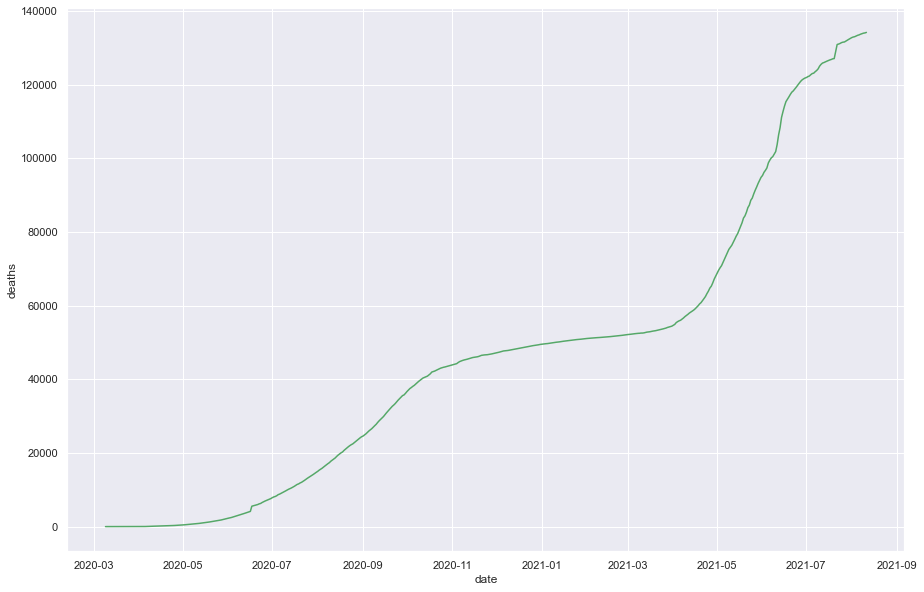

In [21]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="deaths",data= maha, color = 'g')
plt.show()

## Analysis of Kerela state

In [22]:
kerala = df[df.state == 'Kerala']
kerala

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
17946,2021-08-07,Kerala,3317314,17515,3513551
17982,2021-08-08,Kerala,3337579,17654,3533918
18018,2021-08-09,Kerala,3357687,17747,3552525
18054,2021-08-10,Kerala,3377691,17852,3565574


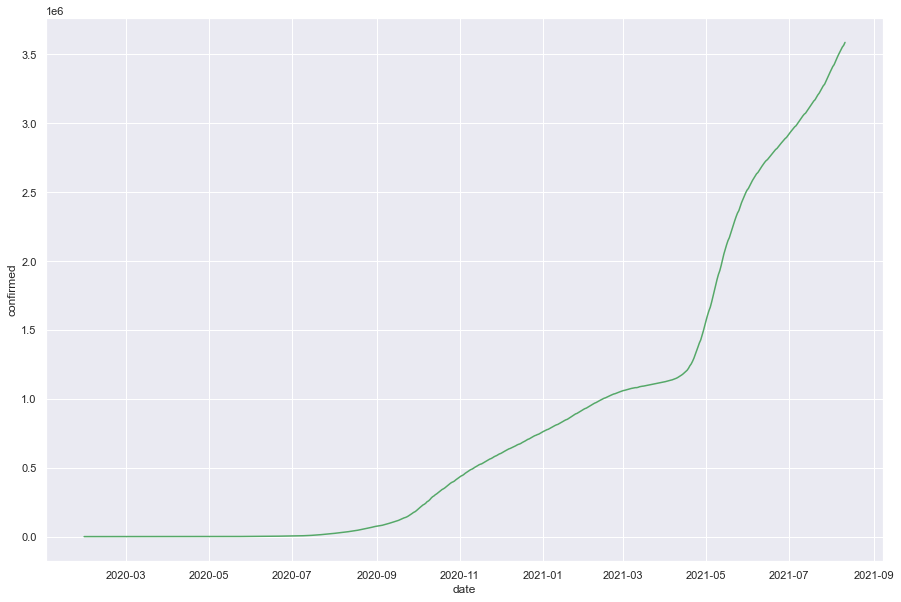

In [23]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="confirmed",data= kerala, color = 'g')
plt.show()

## Analysis of Jammu and Kashmir state

In [24]:
jk = df[df.state == 'Jammu and Kashmir']
jk

,date,state,cured,deaths,confirmed
81,2020-03-09,Jammu and Kashmir,0,0,1
96,2020-03-10,Jammu and Kashmir,0,0,1
106,2020-03-11,Jammu and Kashmir,0,0,1
117,2020-03-12,Jammu and Kashmir,0,0,1
130,2020-03-13,Jammu and Kashmir,0,0,1
...,...,...,...,...,...
17943,2021-08-07,Jammu and Kashmir,316496,4386,322286
17979,2021-08-08,Jammu and Kashmir,316632,4386,322428
18015,2021-08-09,Jammu and Kashmir,316761,4389,322550
18051,2021-08-10,Jammu and Kashmir,316957,4390,322658


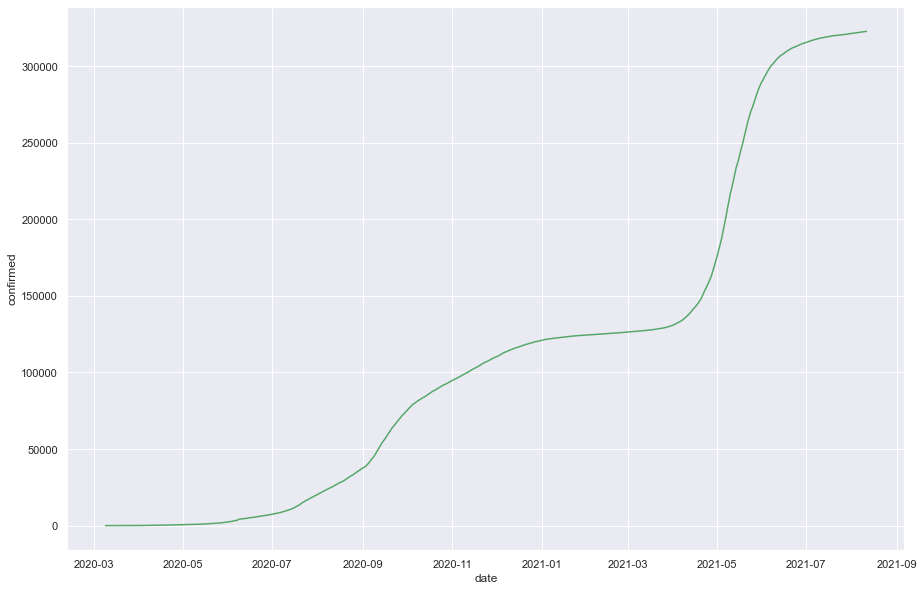

In [25]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="confirmed",data= jk, color = 'g')
plt.show()

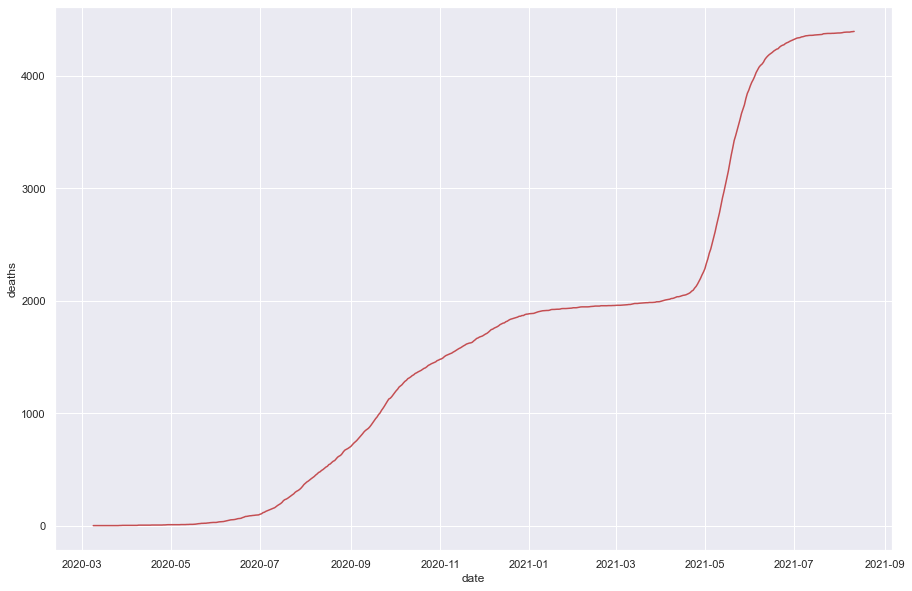

In [26]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="deaths",data= jk, color = 'r')
plt.show()

In [27]:
tests= pd.read_csv('C:/Users/balya/Downloads/StatewiseTestingDetails.csv')
tests

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
16331,2021-08-06,West Bengal,15999961.0,NaN,NaN
16332,2021-08-07,West Bengal,16045662.0,NaN,NaN
16333,2021-08-08,West Bengal,16092192.0,NaN,NaN
16334,2021-08-09,West Bengal,16122345.0,NaN,NaN


In [28]:
test_latest= tests[tests.Date == '2020-07-15']

In [29]:
test_latest

,Date,State,TotalSamples,Negative,Positive
62,2020-07-15,Andaman and Nicobar Islands,19061.0,NaN,176.0
549,2020-07-15,Andhra Pradesh,1217963.0,1182512,35451.0
1027,2020-07-15,Arunachal Pradesh,34619.0,32450,491.0
1495,2020-07-15,Assam,589202.0,NaN,18666.0
1984,2020-07-15,Bihar,337212.0,NaN,20173.0
2472,2020-07-15,Chandigarh,10050.0,9385,619.0
2945,2020-07-15,Chhattisgarh,222113.0,NaN,4556.0
3415,2020-07-15,Dadra and Nagar Haveli and Daman and Diu,37392.0,36195,552.0
3604,2020-07-15,Delhi,736436.0,NaN,116993.0
4087,2020-07-15,Goa,99234.0,NaN,2951.0


## Splitting the dataset into train and test set

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
maha

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14
...,...,...,...,...,...
17950,2021-08-07,Maharashtra,6130137,133717,6341759
17986,2021-08-08,Maharashtra,6139493,133845,6347820
18022,2021-08-09,Maharashtra,6144388,133996,6353328
18058,2021-08-10,Maharashtra,6151956,134064,6357833


In [32]:
maha['date']=maha['date'].map(dt.datetime.toordinal)
maha.head()

C:\Users\balya\AppData\Local\Temp\ipykernel_2236\4140285815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maha['date']=maha['date'].map(dt.datetime.toordinal)


,date,state,cured,deaths,confirmed
76,737493,Maharashtra,0,0,2
91,737494,Maharashtra,0,0,5
97,737495,Maharashtra,0,0,2
120,737496,Maharashtra,0,0,11
133,737497,Maharashtra,0,0,14


## Separating out the dependent and independent columns

In [33]:
x=maha['date']
y=maha['confirmed']

## Splitting the dataset into train and test set

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

## Splitting the dataset into train and test set

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [37]:
y_train

3730      192990
13558    3113354
7000     1443409
14854    5226710
12658    2282191
          ...   
3550      164626
6475     1188015
2086       35058
14818    5179929
15034    5405068
Name: confirmed, Length: 364, dtype: int64

## LinearRegression()

In [38]:
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [39]:
maha.tail()

,date,state,cured,deaths,confirmed
17950,738009,Maharashtra,6130137,133717,6341759
17986,738010,Maharashtra,6139493,133845,6347820
18022,738011,Maharashtra,6144388,133996,6353328
18058,738012,Maharashtra,6151956,134064,6357833
18094,738013,Maharashtra,6159676,134201,6363442


In [46]:
lr.predict(np.array([[2020-7-20]]))

array([[-9.5685511e+09]])